# AlexNet

This notebook is an implement of [___ImageNet Classification with Deep Convolutinal Neural Networks___](https://papers.nips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf) by Krizhevsky et al. The original model was trained for ImageNet dataset, but in this notebook we fine-tuned it for Cifar 10 dataset, which is a relatively smaller dataset and can be stored in Google Colab, which we use for the training process. 

The first step of training an AlexNet is to install and import all the dependent libraries for building and training the model. For our AlexNet, we use TensorFlow for training, Matplotlib for visualization of training process, and Scikit-Learn for training/test data split.

In [1]:
!pip install tensorflow tensorflow-datasets matplotlib sklearn
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.regularizers import l2
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive

drive.mount("/content/drive") 

directory = "/content/drive/My Drive/ComputerVisionModels/alexnet"

Mounted at /content/drive


Here we define function that creates an AlexNet model. The structure of the model is almost same with the original paper, but the kernel size and strides are adjusted to fit the smaller pictures of Cifar 10. We define two variables, weight_decay and dropout_rate, as the hyperparameters of the model for kernel regularization and dropout layer, respectively.

In [3]:
def createAlexNet(weight_decay, dropout_rate):
    model = tf.keras.Sequential([
        Conv2D(input_shape = (32, 32, 3), kernel_size = (3, 3), filters = 48, strides = 1, padding = "same",
            activation = "relu", kernel_regularizer = l2(weight_decay)),
        BatchNormalization(),
        MaxPooling2D(pool_size = (2, 2), padding = "same"),
        Conv2D(kernel_size = (3, 3), filters = 128, padding = "same", activation = "relu",
            kernel_regularizer = l2(weight_decay)),
        BatchNormalization(),
        Conv2D(kernel_size = (3, 3), filters = 192, padding = "same", activation = "relu",
            kernel_regularizer = l2(weight_decay)),
        Conv2D(kernel_size = (3, 3), filters = 192, padding = "same", activation = "relu",
            kernel_regularizer = l2(weight_decay)),
        Conv2D(kernel_size = (3, 3), filters = 128, padding = "same", activation = "relu",
            kernel_regularizer = l2(weight_decay)),
        BatchNormalization(),
        Flatten(),
        Dropout(dropout_rate),
        Activation(activation = "relu"),
        Dropout(dropout_rate),
        Activation(activation = "relu"),
        Dense(10, activation = "softmax")
    ])

    return model

In this part of the program, we get the Cifar 10 dataset using TensorFlow dataset and separate it into training set and test set.

In [4]:
# Set random state for reproducibility
random_state = 4

def get_data():
    x, y = tfds.as_numpy(
        tfds.load("cifar10", split = "train", shuffle_files = True, as_supervised = True, batch_size = -1))

    return train_test_split(x, y, test_size = .2, random_state = random_state)

train_x, test_x, train_y, test_y = get_data()

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteGHE6JS/cifar10-train.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteGHE6JS/cifar10-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.
Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


This part trains AlexNet model we get on Cifar 10 dataset. We store the best weights of each training epochs on drive so that we can continue training even if the session disconnects. We also store searching results and training weights in case the process takes too much time or the session crashes accidentally. We show the result of the training process with a graph about the training and validation accuracy for each epoch. We found out that our best hyperparameters are weight decay of 0.1, dropout rate of 0.5, and learning rate of 1e-5. Although this group of hyperparameters are likely to overfit, it overperforms the group with higher weight decay and dropout rate, so we decided to use this group of hyperparameters.

Epoch 1/100
500/500 [==============================] - 22s 11ms/step - loss: 57.1464 - accuracy: 0.2614 - val_loss: 53.9953 - val_accuracy: 0.3881

Epoch 00001: loss improved from inf to 57.14644, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 2/100
500/500 [==============================] - 5s 11ms/step - loss: 51.4614 - accuracy: 0.3789 - val_loss: 48.6760 - val_accuracy: 0.4457

Epoch 00002: loss improved from 57.14644 to 51.46137, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 3/100
500/500 [==============================] - 6s 11ms/step - loss: 46.2423 - accuracy: 0.4403 - val_loss: 43.7189 - val_accuracy: 0.4786

Epoch 00003: loss improved from 51.46137 to 46.24232, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 4/100
500/500 [==============================] - 5s 11ms/step - loss: 41.4483 - accuracy: 0.4822 - val_loss: 39.2036 - val_accuracy: 0.5100

Epoch 00004: loss improved from 46.24232 to 41.44831, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 5/100
500/500 [==============================] - 6s 11ms/step - loss: 37.1135 - accuracy: 0.5206 - val_loss: 35.1398 - val_accuracy: 0.5344

Epoch 00005: loss improved from 41.44831 to 37.11348, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 6/100
500/500 [==============================] - 5s 11ms/step - loss: 33.2407 - accuracy: 0.5552 - val_loss: 31.5395 - val_accuracy: 0.5519

Epoch 00006: loss improved from 37.11348 to 33.24069, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 7/100
500/500 [==============================] - 6s 11ms/step - loss: 29.8129 - accuracy: 0.5875 - val_loss: 28.3559 - val_accuracy: 0.5720

Epoch 00007: loss improved from 33.24069 to 29.81287, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 8/100
500/500 [==============================] - 5s 11ms/step - loss: 26.7896 - accuracy: 0.6140 - val_loss: 25.5438 - val_accuracy: 0.5895

Epoch 00008: loss improved from 29.81287 to 26.78961, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 9/100
500/500 [==============================] - 5s 11ms/step - loss: 24.1098 - accuracy: 0.6421 - val_loss: 23.0697 - val_accuracy: 0.5955

Epoch 00009: loss improved from 26.78961 to 24.10977, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 10/100
500/500 [==============================] - 5s 11ms/step - loss: 21.7659 - accuracy: 0.6630 - val_loss: 20.8920 - val_accuracy: 0.6040

Epoch 00010: loss improved from 24.10977 to 21.76592, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 11/100
500/500 [==============================] - 5s 11ms/step - loss: 19.6845 - accuracy: 0.6810 - val_loss: 18.9445 - val_accuracy: 0.6191

Epoch 00011: loss improved from 21.76592 to 19.68454, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 12/100
500/500 [==============================] - 5s 11ms/step - loss: 17.8303 - accuracy: 0.7022 - val_loss: 17.2127 - val_accuracy: 0.6277

Epoch 00012: loss improved from 19.68454 to 17.83030, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 13/100
500/500 [==============================] - 5s 11ms/step - loss: 16.1738 - accuracy: 0.7202 - val_loss: 15.6506 - val_accuracy: 0.6367

Epoch 00013: loss improved from 17.83030 to 16.17384, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 14/100
500/500 [==============================] - 5s 11ms/step - loss: 14.6861 - accuracy: 0.7333 - val_loss: 14.2466 - val_accuracy: 0.6407

Epoch 00014: loss improved from 16.17384 to 14.68606, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 15/100
500/500 [==============================] - 5s 11ms/step - loss: 13.3436 - accuracy: 0.7431 - val_loss: 12.9691 - val_accuracy: 0.6510

Epoch 00015: loss improved from 14.68606 to 13.34359, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 16/100
500/500 [==============================] - 6s 11ms/step - loss: 12.1276 - accuracy: 0.7518 - val_loss: 11.8243 - val_accuracy: 0.6511

Epoch 00016: loss improved from 13.34359 to 12.12762, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 17/100
500/500 [==============================] - 5s 11ms/step - loss: 11.0353 - accuracy: 0.7588 - val_loss: 10.7764 - val_accuracy: 0.6580

Epoch 00017: loss improved from 12.12762 to 11.03526, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 18/100
500/500 [==============================] - 5s 11ms/step - loss: 10.0477 - accuracy: 0.7653 - val_loss: 9.8636 - val_accuracy: 0.6538

Epoch 00018: loss improved from 11.03526 to 10.04772, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 19/100
500/500 [==============================] - 6s 11ms/step - loss: 9.1598 - accuracy: 0.7682 - val_loss: 8.9859 - val_accuracy: 0.6672

Epoch 00019: loss improved from 10.04772 to 9.15975, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 20/100
500/500 [==============================] - 6s 11ms/step - loss: 8.3627 - accuracy: 0.7696 - val_loss: 8.2442 - val_accuracy: 0.6731

Epoch 00020: loss improved from 9.15975 to 8.36267, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 21/100
500/500 [==============================] - 5s 11ms/step - loss: 7.6435 - accuracy: 0.7739 - val_loss: 7.5400 - val_accuracy: 0.6829

Epoch 00021: loss improved from 8.36267 to 7.64349, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 22/100
500/500 [==============================] - 6s 11ms/step - loss: 7.0045 - accuracy: 0.7745 - val_loss: 6.9238 - val_accuracy: 0.6861

Epoch 00022: loss improved from 7.64349 to 7.00448, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 23/100
500/500 [==============================] - 5s 11ms/step - loss: 6.4316 - accuracy: 0.7751 - val_loss: 6.3821 - val_accuracy: 0.6927

Epoch 00023: loss improved from 7.00448 to 6.43155, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 24/100
500/500 [==============================] - 6s 11ms/step - loss: 5.9153 - accuracy: 0.7778 - val_loss: 5.8835 - val_accuracy: 0.6952

Epoch 00024: loss improved from 6.43155 to 5.91530, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 25/100
500/500 [==============================] - 5s 11ms/step - loss: 5.4568 - accuracy: 0.7772 - val_loss: 5.4434 - val_accuracy: 0.7005

Epoch 00025: loss improved from 5.91530 to 5.45683, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 26/100
500/500 [==============================] - 5s 11ms/step - loss: 5.0454 - accuracy: 0.7780 - val_loss: 5.0698 - val_accuracy: 0.7004

Epoch 00026: loss improved from 5.45683 to 5.04543, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 27/100
500/500 [==============================] - 6s 11ms/step - loss: 4.6837 - accuracy: 0.7783 - val_loss: 4.6993 - val_accuracy: 0.7088

Epoch 00027: loss improved from 5.04543 to 4.68367, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 28/100
500/500 [==============================] - 5s 11ms/step - loss: 4.3582 - accuracy: 0.7799 - val_loss: 4.3957 - val_accuracy: 0.7105

Epoch 00028: loss improved from 4.68367 to 4.35823, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 29/100
500/500 [==============================] - 5s 11ms/step - loss: 4.0683 - accuracy: 0.7824 - val_loss: 4.0990 - val_accuracy: 0.7181

Epoch 00029: loss improved from 4.35823 to 4.06831, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 30/100
500/500 [==============================] - 5s 11ms/step - loss: 3.8029 - accuracy: 0.7858 - val_loss: 3.8660 - val_accuracy: 0.7139

Epoch 00030: loss improved from 4.06831 to 3.80287, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 31/100
500/500 [==============================] - 6s 11ms/step - loss: 3.5725 - accuracy: 0.7871 - val_loss: 3.6275 - val_accuracy: 0.7297

Epoch 00031: loss improved from 3.80287 to 3.57247, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 32/100
500/500 [==============================] - 5s 11ms/step - loss: 3.3621 - accuracy: 0.7882 - val_loss: 3.4270 - val_accuracy: 0.7297

Epoch 00032: loss improved from 3.57247 to 3.36211, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 33/100
500/500 [==============================] - 5s 11ms/step - loss: 3.1754 - accuracy: 0.7878 - val_loss: 3.2743 - val_accuracy: 0.7190

Epoch 00033: loss improved from 3.36211 to 3.17538, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 34/100
500/500 [==============================] - 5s 11ms/step - loss: 3.0122 - accuracy: 0.7897 - val_loss: 3.1426 - val_accuracy: 0.7157

Epoch 00034: loss improved from 3.17538 to 3.01218, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 35/100
500/500 [==============================] - 6s 11ms/step - loss: 2.8558 - accuracy: 0.7931 - val_loss: 2.9684 - val_accuracy: 0.7272

Epoch 00035: loss improved from 3.01218 to 2.85582, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 36/100
500/500 [==============================] - 5s 11ms/step - loss: 2.7195 - accuracy: 0.7940 - val_loss: 2.8210 - val_accuracy: 0.7347

Epoch 00036: loss improved from 2.85582 to 2.71945, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 37/100
500/500 [==============================] - 5s 11ms/step - loss: 2.5940 - accuracy: 0.7973 - val_loss: 2.6996 - val_accuracy: 0.7405

Epoch 00037: loss improved from 2.71945 to 2.59401, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 38/100
500/500 [==============================] - 6s 11ms/step - loss: 2.4811 - accuracy: 0.7991 - val_loss: 2.6343 - val_accuracy: 0.7251

Epoch 00038: loss improved from 2.59401 to 2.48113, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 39/100
500/500 [==============================] - 6s 11ms/step - loss: 2.3808 - accuracy: 0.8005 - val_loss: 2.5162 - val_accuracy: 0.7339

Epoch 00039: loss improved from 2.48113 to 2.38079, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 40/100
500/500 [==============================] - 6s 11ms/step - loss: 2.2840 - accuracy: 0.8053 - val_loss: 2.3993 - val_accuracy: 0.7494

Epoch 00040: loss improved from 2.38079 to 2.28400, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 41/100
500/500 [==============================] - 5s 11ms/step - loss: 2.1963 - accuracy: 0.8087 - val_loss: 2.3330 - val_accuracy: 0.7466

Epoch 00041: loss improved from 2.28400 to 2.19630, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 42/100
500/500 [==============================] - 5s 11ms/step - loss: 2.1159 - accuracy: 0.8110 - val_loss: 2.2624 - val_accuracy: 0.7506

Epoch 00042: loss improved from 2.19630 to 2.11595, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 43/100
500/500 [==============================] - 6s 11ms/step - loss: 2.0457 - accuracy: 0.8133 - val_loss: 2.2019 - val_accuracy: 0.7475

Epoch 00043: loss improved from 2.11595 to 2.04568, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 44/100
500/500 [==============================] - 5s 11ms/step - loss: 1.9786 - accuracy: 0.8154 - val_loss: 2.1303 - val_accuracy: 0.7516

Epoch 00044: loss improved from 2.04568 to 1.97862, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 45/100
500/500 [==============================] - 6s 11ms/step - loss: 1.9176 - accuracy: 0.8179 - val_loss: 2.0589 - val_accuracy: 0.7591

Epoch 00045: loss improved from 1.97862 to 1.91760, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 46/100
500/500 [==============================] - 5s 11ms/step - loss: 1.8568 - accuracy: 0.8183 - val_loss: 2.0520 - val_accuracy: 0.7429

Epoch 00046: loss improved from 1.91760 to 1.85678, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 47/100
500/500 [==============================] - 5s 11ms/step - loss: 1.8028 - accuracy: 0.8216 - val_loss: 1.9580 - val_accuracy: 0.7613

Epoch 00047: loss improved from 1.85678 to 1.80276, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 48/100
500/500 [==============================] - 6s 11ms/step - loss: 1.7514 - accuracy: 0.8271 - val_loss: 1.9282 - val_accuracy: 0.7571

Epoch 00048: loss improved from 1.80276 to 1.75140, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 49/100
500/500 [==============================] - 6s 11ms/step - loss: 1.7029 - accuracy: 0.8312 - val_loss: 1.8850 - val_accuracy: 0.7609

Epoch 00049: loss improved from 1.75140 to 1.70285, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 50/100
500/500 [==============================] - 6s 11ms/step - loss: 1.6597 - accuracy: 0.8306 - val_loss: 1.8925 - val_accuracy: 0.7437

Epoch 00050: loss improved from 1.70285 to 1.65971, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 51/100
500/500 [==============================] - 5s 11ms/step - loss: 1.6188 - accuracy: 0.8345 - val_loss: 1.8286 - val_accuracy: 0.7582

Epoch 00051: loss improved from 1.65971 to 1.61880, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 52/100
500/500 [==============================] - 5s 11ms/step - loss: 1.5791 - accuracy: 0.8367 - val_loss: 1.7784 - val_accuracy: 0.7635

Epoch 00052: loss improved from 1.61880 to 1.57912, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 53/100
500/500 [==============================] - 6s 11ms/step - loss: 1.5429 - accuracy: 0.8412 - val_loss: 1.7477 - val_accuracy: 0.7623

Epoch 00053: loss improved from 1.57912 to 1.54288, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 54/100
500/500 [==============================] - 6s 11ms/step - loss: 1.5083 - accuracy: 0.8405 - val_loss: 1.7171 - val_accuracy: 0.7675

Epoch 00054: loss improved from 1.54288 to 1.50828, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 55/100
500/500 [==============================] - 6s 11ms/step - loss: 1.4763 - accuracy: 0.8434 - val_loss: 1.6949 - val_accuracy: 0.7644

Epoch 00055: loss improved from 1.50828 to 1.47632, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 56/100
500/500 [==============================] - 6s 11ms/step - loss: 1.4451 - accuracy: 0.8500 - val_loss: 1.6704 - val_accuracy: 0.7621

Epoch 00056: loss improved from 1.47632 to 1.44506, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 57/100
500/500 [==============================] - 5s 11ms/step - loss: 1.4193 - accuracy: 0.8497 - val_loss: 1.6720 - val_accuracy: 0.7536

Epoch 00057: loss improved from 1.44506 to 1.41926, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 58/100
500/500 [==============================] - 6s 11ms/step - loss: 1.3906 - accuracy: 0.8519 - val_loss: 1.6052 - val_accuracy: 0.7747

Epoch 00058: loss improved from 1.41926 to 1.39062, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 59/100
500/500 [==============================] - 5s 11ms/step - loss: 1.3616 - accuracy: 0.8547 - val_loss: 1.5897 - val_accuracy: 0.7739

Epoch 00059: loss improved from 1.39062 to 1.36160, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 60/100
500/500 [==============================] - 5s 11ms/step - loss: 1.3360 - accuracy: 0.8575 - val_loss: 1.6128 - val_accuracy: 0.7595

Epoch 00060: loss improved from 1.36160 to 1.33601, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 61/100
500/500 [==============================] - 5s 11ms/step - loss: 1.3141 - accuracy: 0.8575 - val_loss: 1.5909 - val_accuracy: 0.7610

Epoch 00061: loss improved from 1.33601 to 1.31411, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 62/100
500/500 [==============================] - 5s 11ms/step - loss: 1.2912 - accuracy: 0.8613 - val_loss: 1.5522 - val_accuracy: 0.7747

Epoch 00062: loss improved from 1.31411 to 1.29115, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 63/100
500/500 [==============================] - 5s 11ms/step - loss: 1.2722 - accuracy: 0.8602 - val_loss: 1.5362 - val_accuracy: 0.7711

Epoch 00063: loss improved from 1.29115 to 1.27219, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 64/100
500/500 [==============================] - 5s 11ms/step - loss: 1.2466 - accuracy: 0.8692 - val_loss: 1.5360 - val_accuracy: 0.7703

Epoch 00064: loss improved from 1.27219 to 1.24656, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 65/100
500/500 [==============================] - 6s 11ms/step - loss: 1.2286 - accuracy: 0.8686 - val_loss: 1.4979 - val_accuracy: 0.7738

Epoch 00065: loss improved from 1.24656 to 1.22857, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 66/100
500/500 [==============================] - 5s 11ms/step - loss: 1.2094 - accuracy: 0.8714 - val_loss: 1.5109 - val_accuracy: 0.7696

Epoch 00066: loss improved from 1.22857 to 1.20942, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 67/100
500/500 [==============================] - 5s 11ms/step - loss: 1.1910 - accuracy: 0.8726 - val_loss: 1.5255 - val_accuracy: 0.7614

Epoch 00067: loss improved from 1.20942 to 1.19101, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 68/100
500/500 [==============================] - 5s 11ms/step - loss: 1.1721 - accuracy: 0.8759 - val_loss: 1.4729 - val_accuracy: 0.7741

Epoch 00068: loss improved from 1.19101 to 1.17210, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 69/100
500/500 [==============================] - 6s 11ms/step - loss: 1.1555 - accuracy: 0.8779 - val_loss: 1.4576 - val_accuracy: 0.7720

Epoch 00069: loss improved from 1.17210 to 1.15552, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 70/100
500/500 [==============================] - 6s 11ms/step - loss: 1.1393 - accuracy: 0.8804 - val_loss: 1.4569 - val_accuracy: 0.7728

Epoch 00070: loss improved from 1.15552 to 1.13933, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 71/100
500/500 [==============================] - 5s 11ms/step - loss: 1.1231 - accuracy: 0.8820 - val_loss: 1.4335 - val_accuracy: 0.7751

Epoch 00071: loss improved from 1.13933 to 1.12311, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 72/100
500/500 [==============================] - 5s 11ms/step - loss: 1.1065 - accuracy: 0.8861 - val_loss: 1.4135 - val_accuracy: 0.7826

Epoch 00072: loss improved from 1.12311 to 1.10653, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 73/100
500/500 [==============================] - 5s 11ms/step - loss: 1.0939 - accuracy: 0.8876 - val_loss: 1.4113 - val_accuracy: 0.7781

Epoch 00073: loss improved from 1.10653 to 1.09389, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 74/100
500/500 [==============================] - 6s 11ms/step - loss: 1.0810 - accuracy: 0.8897 - val_loss: 1.3917 - val_accuracy: 0.7818

Epoch 00074: loss improved from 1.09389 to 1.08103, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 75/100
500/500 [==============================] - 6s 11ms/step - loss: 1.0672 - accuracy: 0.8915 - val_loss: 1.4032 - val_accuracy: 0.7775

Epoch 00075: loss improved from 1.08103 to 1.06724, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 76/100
500/500 [==============================] - 5s 11ms/step - loss: 1.0517 - accuracy: 0.8935 - val_loss: 1.3895 - val_accuracy: 0.7828

Epoch 00076: loss improved from 1.06724 to 1.05166, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 77/100
500/500 [==============================] - 5s 11ms/step - loss: 1.0384 - accuracy: 0.8944 - val_loss: 1.4182 - val_accuracy: 0.7729

Epoch 00077: loss improved from 1.05166 to 1.03840, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 78/100
500/500 [==============================] - 5s 11ms/step - loss: 1.0261 - accuracy: 0.8988 - val_loss: 1.3551 - val_accuracy: 0.7889

Epoch 00078: loss improved from 1.03840 to 1.02610, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 79/100
500/500 [==============================] - 6s 11ms/step - loss: 1.0142 - accuracy: 0.8992 - val_loss: 1.3558 - val_accuracy: 0.7853

Epoch 00079: loss improved from 1.02610 to 1.01423, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 80/100
500/500 [==============================] - 6s 11ms/step - loss: 1.0006 - accuracy: 0.9023 - val_loss: 1.4028 - val_accuracy: 0.7673

Epoch 00080: loss improved from 1.01423 to 1.00061, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 81/100
500/500 [==============================] - 5s 11ms/step - loss: 0.9912 - accuracy: 0.9015 - val_loss: 1.3939 - val_accuracy: 0.7688

Epoch 00081: loss improved from 1.00061 to 0.99117, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 82/100
500/500 [==============================] - 5s 11ms/step - loss: 0.9807 - accuracy: 0.9045 - val_loss: 1.3622 - val_accuracy: 0.7764

Epoch 00082: loss improved from 0.99117 to 0.98070, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 83/100
500/500 [==============================] - 5s 11ms/step - loss: 0.9674 - accuracy: 0.9085 - val_loss: 1.3378 - val_accuracy: 0.7815

Epoch 00083: loss improved from 0.98070 to 0.96742, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 84/100
500/500 [==============================] - 6s 11ms/step - loss: 0.9552 - accuracy: 0.9103 - val_loss: 1.3501 - val_accuracy: 0.7786

Epoch 00084: loss improved from 0.96742 to 0.95523, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 85/100
500/500 [==============================] - 5s 11ms/step - loss: 0.9490 - accuracy: 0.9096 - val_loss: 1.3664 - val_accuracy: 0.7697

Epoch 00085: loss improved from 0.95523 to 0.94896, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 86/100
500/500 [==============================] - 5s 11ms/step - loss: 0.9386 - accuracy: 0.9116 - val_loss: 1.3558 - val_accuracy: 0.7717

Epoch 00086: loss improved from 0.94896 to 0.93865, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 87/100
500/500 [==============================] - 6s 11ms/step - loss: 0.9268 - accuracy: 0.9134 - val_loss: 1.3460 - val_accuracy: 0.7770

Epoch 00087: loss improved from 0.93865 to 0.92677, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 88/100
500/500 [==============================] - 5s 11ms/step - loss: 0.9188 - accuracy: 0.9156 - val_loss: 1.3171 - val_accuracy: 0.7860

Epoch 00088: loss improved from 0.92677 to 0.91882, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 89/100
500/500 [==============================] - 6s 11ms/step - loss: 0.9062 - accuracy: 0.9185 - val_loss: 1.3149 - val_accuracy: 0.7810

Epoch 00089: loss improved from 0.91882 to 0.90621, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 90/100
500/500 [==============================] - 6s 11ms/step - loss: 0.8929 - accuracy: 0.9225 - val_loss: 1.3181 - val_accuracy: 0.7871

Epoch 00090: loss improved from 0.90621 to 0.89289, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 91/100
500/500 [==============================] - 6s 11ms/step - loss: 0.8887 - accuracy: 0.9198 - val_loss: 1.3257 - val_accuracy: 0.7825

Epoch 00091: loss improved from 0.89289 to 0.88868, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 92/100
500/500 [==============================] - 6s 11ms/step - loss: 0.8790 - accuracy: 0.9237 - val_loss: 1.3294 - val_accuracy: 0.7757

Epoch 00092: loss improved from 0.88868 to 0.87897, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 93/100
500/500 [==============================] - 6s 11ms/step - loss: 0.8681 - accuracy: 0.9253 - val_loss: 1.3085 - val_accuracy: 0.7809

Epoch 00093: loss improved from 0.87897 to 0.86811, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 94/100
500/500 [==============================] - 5s 11ms/step - loss: 0.8619 - accuracy: 0.9255 - val_loss: 1.3433 - val_accuracy: 0.7680

Epoch 00094: loss improved from 0.86811 to 0.86185, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 95/100
500/500 [==============================] - 6s 11ms/step - loss: 0.8527 - accuracy: 0.9280 - val_loss: 1.3048 - val_accuracy: 0.7828

Epoch 00095: loss improved from 0.86185 to 0.85273, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 96/100
500/500 [==============================] - 6s 11ms/step - loss: 0.8427 - accuracy: 0.9306 - val_loss: 1.2914 - val_accuracy: 0.7868

Epoch 00096: loss improved from 0.85273 to 0.84273, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 97/100
500/500 [==============================] - 5s 11ms/step - loss: 0.8387 - accuracy: 0.9308 - val_loss: 1.2850 - val_accuracy: 0.7841

Epoch 00097: loss improved from 0.84273 to 0.83870, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 98/100
500/500 [==============================] - 5s 11ms/step - loss: 0.8257 - accuracy: 0.9336 - val_loss: 1.2600 - val_accuracy: 0.7890

Epoch 00098: loss improved from 0.83870 to 0.82566, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 99/100
500/500 [==============================] - 6s 11ms/step - loss: 0.8238 - accuracy: 0.9333 - val_loss: 1.2860 - val_accuracy: 0.7859

Epoch 00099: loss improved from 0.82566 to 0.82382, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


Epoch 100/100
500/500 [==============================] - 5s 11ms/step - loss: 0.8126 - accuracy: 0.9348 - val_loss: 1.2924 - val_accuracy: 0.7789

Epoch 00100: loss improved from 0.82382 to 0.81261, saving model to /content/drive/My Drive/ComputerVisionModels/alexnet/weights
INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ComputerVisionModels/alexnet/weights/assets


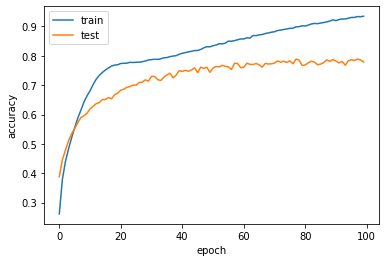

In [5]:
# Set a checkpoint to save weights
cp = tf.keras.callbacks.ModelCheckpoint(directory + "/weights", monitor = "loss", verbose = 1, save_best_only = True, mode = "auto")

model = createAlexNet(.1, .2)
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-5), loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ["accuracy"])

# We can use the existing data if the training process has started
# model.load_weights(directory + "/weights")

history = model.fit(train_x, train_y, epochs = 100, validation_split = .2, batch_size = 64, callbacks = [cp])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

Here we test our model on test set and show how AlexNet predicts on sample images in the test set.

Test Accuracy: 78.84%


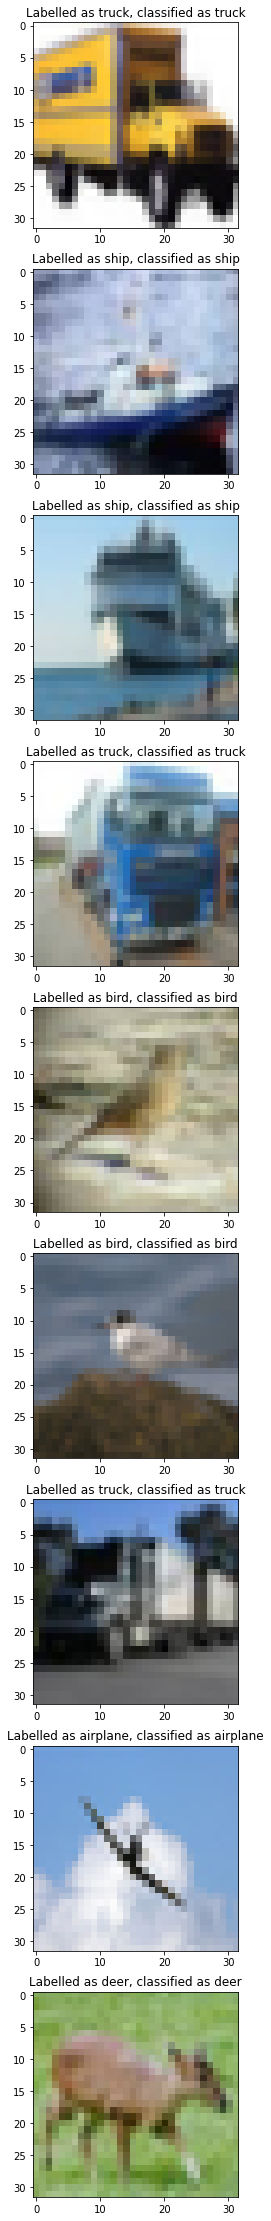

In [7]:
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

pred = np.argmax(model.predict(test_x), axis = 1)

print("Test Accuracy: {:.2%}".format(np.sum(pred == test_y) / len(test_y)))

sample_x = test_x[: 9]
sample_y = test_y[: 9]

fig = plt.figure(figsize = (10, 40))

for i in range(len(sample_x)):
    ax = fig.add_subplot(911 + i)
    ax.imshow(test_x[i])

    ax.set_title("Labelled as " + labels[int(sample_y[i])] + ", classified as " + labels[int(pred[i])])